<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">ML-3 GA_ExamPaper_40 Marks </h1> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage , dendrogram, fcluster,cophenet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from surprise import KNNWithMeans,SVDpp
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split,cross_validate





### We combined two datasets in single CSV file. Use the below script to seperate the data.
#### Use data_dime for dimensionality reduction and data_recom for recommendation system.


import pandas as pd

data=pd.read_csv('data_set.csv')


data_dime=data.iloc[0:5891,0:30]

data_recom=data.iloc[:,30:34]


In [2]:
import pandas as pd

data=pd.read_csv('data_set.csv')

data_dime=data.iloc[0:5891,0:30]

data_recom=data.iloc[:,30:34]

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (6,7,8,11,12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Section A - 5 Marks </h1> 

### 1. Data Preprocessing 

### 1.a. Read the dataset and perform required cleaning and preprocessing prior to model building. (1 Marks)

In [3]:
data_dime.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592.0,2006.0,2007.0,8.0,814.0,3.0,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5.0,6.0,9.0
1,51327.0,1985.0,2007.0,8.0,587.0,8.0,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3.0,12.0,4.0
2,48672.0,1985.0,2007.0,8.0,587.0,6.0,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3.0,12.0,4.0
3,380530.0,2006.0,2007.0,8.0,2056.0,8.0,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5.0,3.0,7.0
4,221238.0,1993.0,2007.0,8.0,1761.0,3.0,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4.0,14.0,17.0


In [4]:
data_dime.shape

(5891, 30)

In [6]:
data_dime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   float64
 1   YearBuilt                           5891 non-null   float64
 2   YrSold                              5891 non-null   float64
 3   MonthSold                           5891 non-null   float64
 4   Size(sqf)                           5891 non-null   float64
 5   Floor                               5891 non-null   float64
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   float64
 10  N_Parkinglot(Basement)              5891 non-null   float64
 11  TimeToBusStop                       5891 no

In [7]:
data_recom.head()

,UserID,ItemID,Rating,Timestamp
0,905,470,1,889325071
1,697,1518,5,879835275
2,855,1687,5,875638677
3,950,1447,5,877420720
4,806,1170,4,879889337


In [8]:
data_recom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85724 entries, 0 to 85723
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   UserID     85724 non-null  int64
 1   ItemID     85724 non-null  int64
 2   Rating     85724 non-null  int64
 3   Timestamp  85724 non-null  int64
dtypes: int64(4)
memory usage: 2.6 MB


In [9]:
data_recom.shape

(85724, 4)

### 1.b. Calculate five-point summary for numerical variables. Summarize observations for categorical variables – no. of categories, % observations in each category. (1 MARK) 

In [10]:
print("Five-Point summary for numerical variable")
data_dime.describe()

Five-Point summary for numerical variable


,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,...,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,221218.112545,2002.967408,2012.691563,6.160244,955.569173,12.026311,195.883551,570.761670,5.613648,6.310304,...,0.941436,1.941266,0.654218,3.022407,2.417756,2.659311,2.764726,5.809540,9.870820,10.864200
std,106384.186446,8.811782,2.905488,3.387752,382.464050,7.548743,218.597210,408.621075,2.811831,3.174088,...,0.401355,2.201392,0.658320,0.954575,1.037898,1.556041,1.489289,2.330804,3.450319,4.438513
min,32743.000000,1978.000000,2007.000000,1.000000,135.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,144247.000000,1993.000000,2010.000000,3.000000,644.000000,6.000000,11.000000,184.000000,3.000000,5.000000,...,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,4.000000,8.000000,7.000000
50%,207964.000000,2006.000000,2013.000000,6.000000,910.000000,11.000000,100.000000,536.000000,7.000000,6.000000,...,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,5.000000,9.000000,10.000000
75%,291150.000000,2008.000000,2015.000000,9.000000,1149.000000,17.000000,249.000000,798.000000,8.000000,8.000000,...,1.000000,5.000000,1.000000,4.000000,3.000000,4.000000,4.000000,7.000000,13.000000,15.000000
max,585840.000000,2015.000000,2017.000000,12.000000,2337.000000,43.000000,713.000000,1321.000000,13.000000,14.000000,...,2.000000,5.000000,2.000000,6.000000,4.000000,5.000000,5.000000,10.000000,16.000000,17.000000


In [16]:
print('Summary for Categorial Variables:')
data_dime.select_dtypes(include=['object']).apply(lambda x: x.value_counts(normalize=True)*100)

Summary for Categorial Variables:


,HallwayType,HeatingType,AptManageType,TimeToBusStop,TimeToSubway,SubwayStation
0-5min,NaN,NaN,NaN,NaN,46.834154,NaN
0~5min,NaN,NaN,NaN,76.540485,NaN,NaN
10min~15min,NaN,NaN,NaN,0.933628,13.681888,NaN
15min~20min,NaN,NaN,NaN,NaN,16.177219,NaN
5min~10min,NaN,NaN,NaN,22.525887,19.266678,NaN
Bangoge,NaN,NaN,NaN,NaN,NaN,12.510609
Banwoldang,NaN,NaN,NaN,NaN,NaN,12.697335
Chil-sung-market,NaN,NaN,NaN,NaN,NaN,1.952130
Daegu,NaN,NaN,NaN,NaN,NaN,1.442879
Kyungbuk_uni_hospital,NaN,NaN,NaN,NaN,NaN,27.906977


### 1.c. Perform univariate and bivariate analysis (2 Marks)

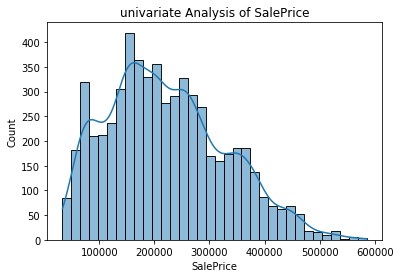

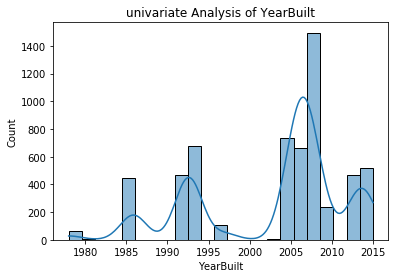

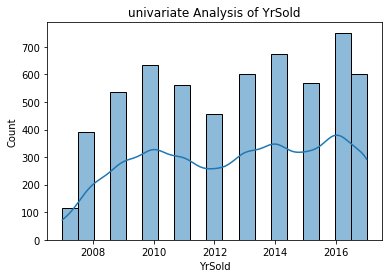

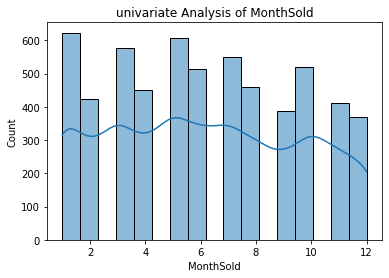

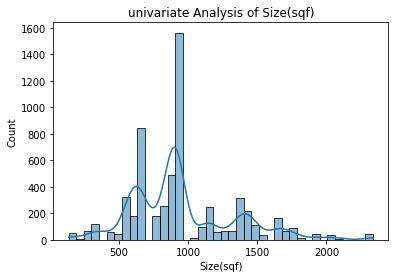

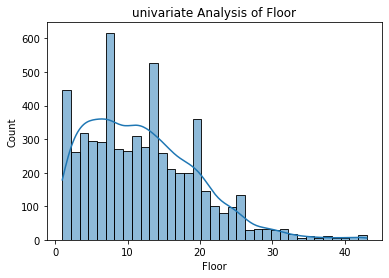

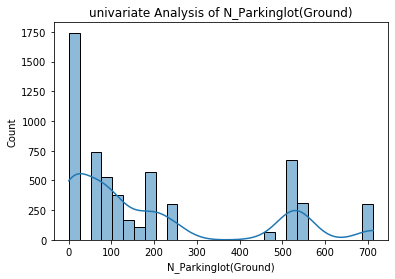

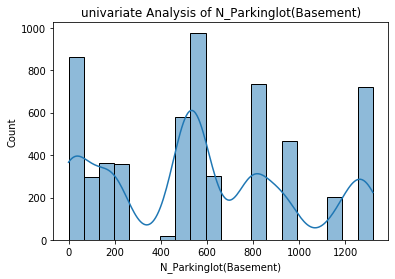

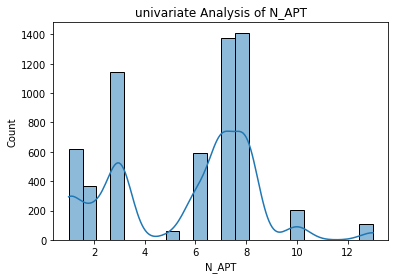

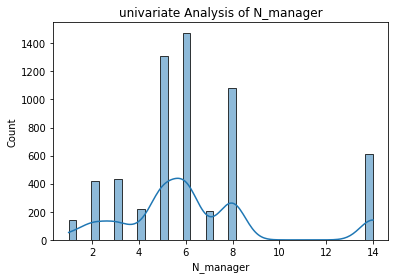

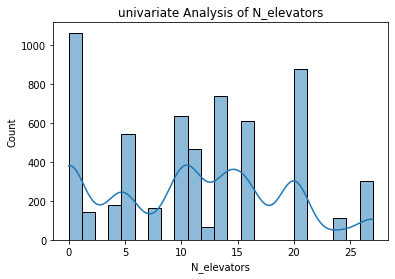

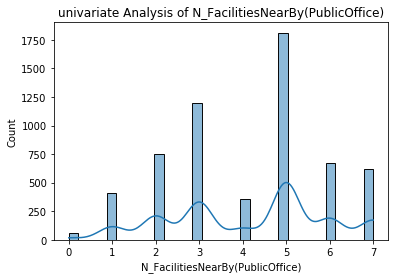

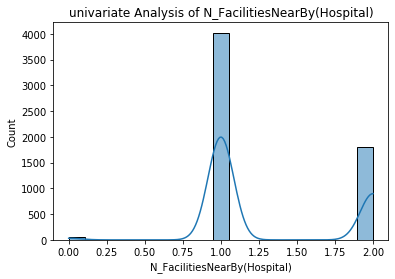

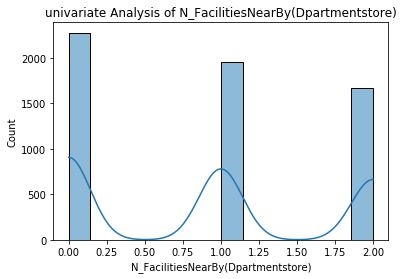

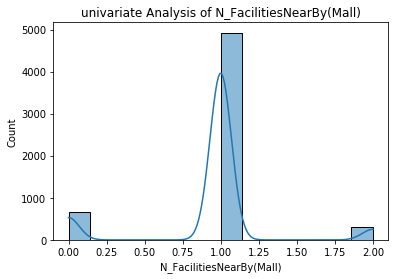

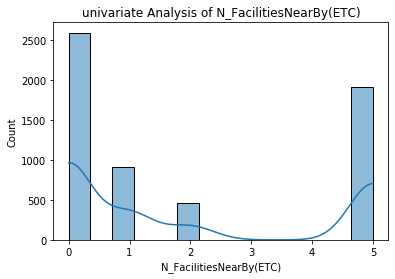

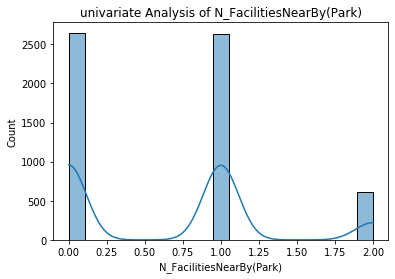

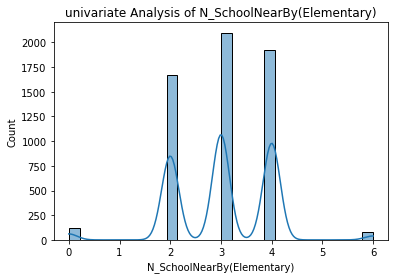

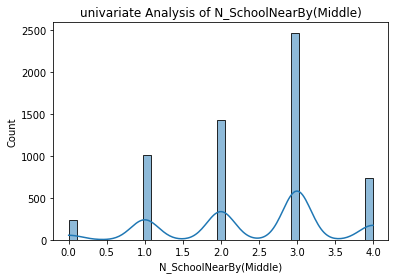

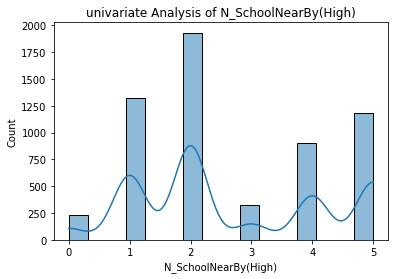

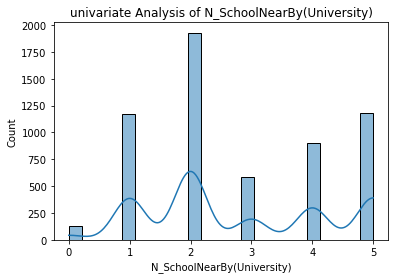

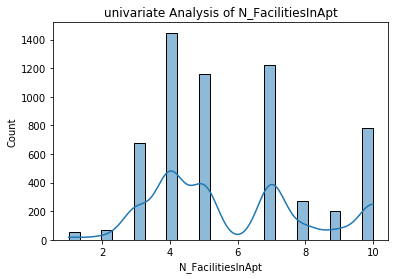

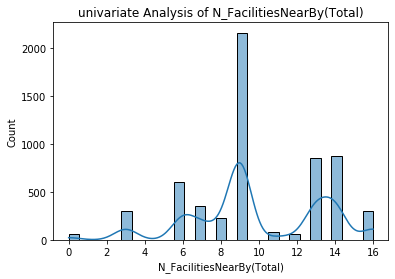

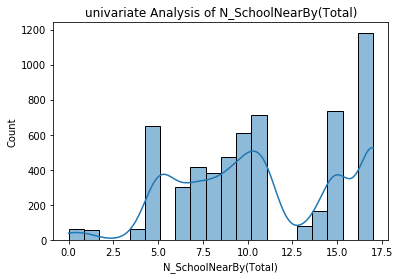

In [19]:
import seaborn as sns

#univariate
for col in data_dime.select_dtypes(include=['number']).columns:
    sns.histplot(data_dime[col],kde=True)
    plt.title(f'univariate Analysis of {col}')
    plt.show()

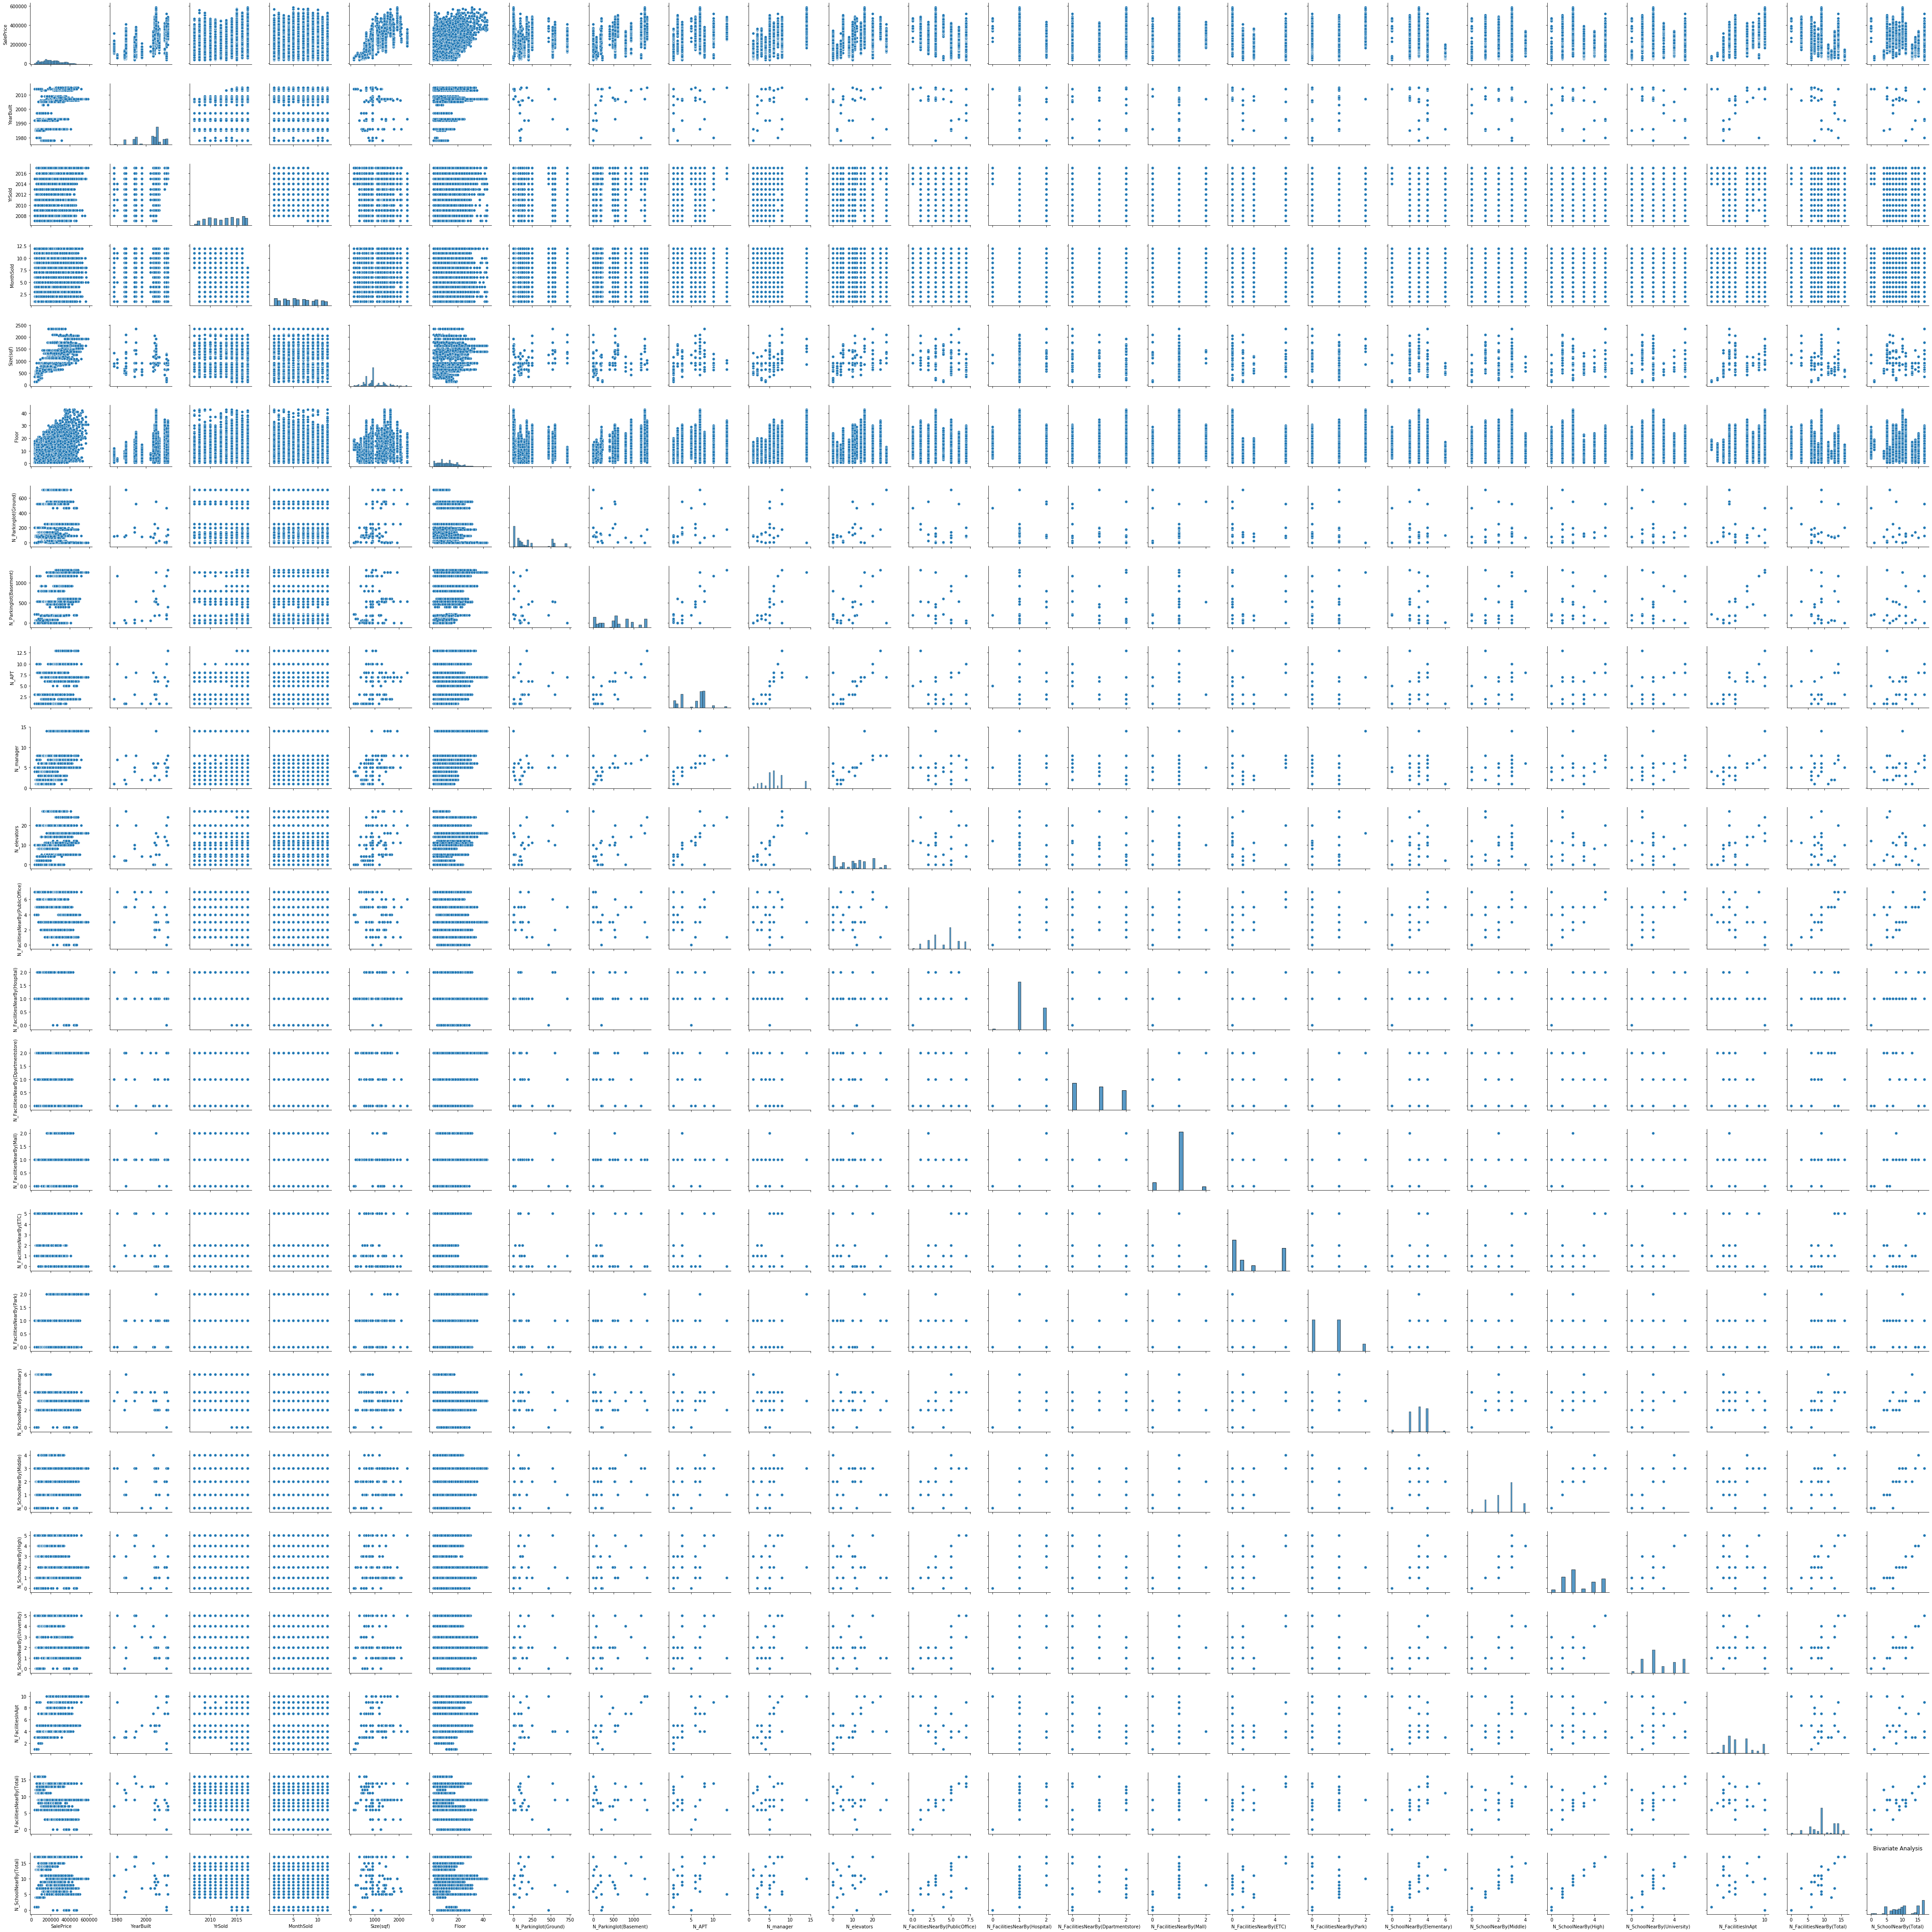

In [20]:
#Bivariate analysis
sns.pairplot(data_dime.select_dtypes(include=['number']))
plt.title('Bivariate Analysis')
plt.show()

### 1.d. Scale / Transform/ clean the data so that it is suitable for model building. Drop "SalePrice" before using clustering methods, as this is the target attribute. (1 MARK) 

#Keep the input features of data_dime (independent variables) in inp_data_dime and output feature (`SalePrice`) in out. 

In [30]:
df=data_dime.drop(columns=['SalePrice'])
df_num=data_dime.select_dtypes(include=['number'])
df_cat=data_dime.select_dtypes(include=['object'])



In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df_cat.columns:
    df_cat[i]=le.fit_transform(df_cat[i])

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [32]:
inp_data_dime= pd.concat([df_num,df_cat],axis=1)
inp_data_dime.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,...,N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),HallwayType,HeatingType,AptManageType,TimeToBusStop,TimeToSubway,SubwayStation
0,141592.0,2006.0,2007.0,8.0,814.0,3.0,111.0,184.0,3.0,3.0,...,2.0,5.0,6.0,9.0,2,1,0,2,1,4
1,51327.0,1985.0,2007.0,8.0,587.0,8.0,80.0,76.0,1.0,2.0,...,0.0,3.0,12.0,4.0,0,1,1,0,3,3
2,48672.0,1985.0,2007.0,8.0,587.0,6.0,80.0,76.0,1.0,2.0,...,0.0,3.0,12.0,4.0,0,1,1,0,3,3
3,380530.0,2006.0,2007.0,8.0,2056.0,8.0,249.0,536.0,6.0,5.0,...,2.0,5.0,3.0,7.0,2,1,0,0,0,6
4,221238.0,1993.0,2007.0,8.0,1761.0,3.0,523.0,536.0,8.0,8.0,...,5.0,4.0,14.0,17.0,1,1,0,0,2,5


In [33]:
# scaling the data
scalar=StandardScaler()
scaled_data= scalar.fit_transform(inp_data_dime)
scaled_data

array([[-0.7485405 ,  0.3441812 , -1.95906706, ...,  1.84226666,
        -0.15227804,  0.11906499],
       [-1.59709389, -2.03919411, -1.95906706, ..., -0.55006066,
         1.37076087, -0.35294836],
       [-1.62205272, -2.03919411, -1.95906706, ..., -0.55006066,
         1.37076087, -0.35294836],
       ...,
       [ 1.28135076,  0.45767526,  1.4829873 , ..., -0.55006066,
        -0.91379749,  0.11906499],
       [ 0.85706936, -2.83365255,  1.4829873 , ..., -0.55006066,
        -0.91379749,  0.11906499],
       [ 1.62243604,  0.45767526,  1.4829873 , ..., -0.55006066,
        -0.91379749,  0.11906499]])

<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Section B - 20 Marks </h1> 

### 2.a. Use inp_data_dime. Apply PCA and compute all the possible principle components(PCs). How many PCs are required to reproduce the 95% charecteristics of original data. Plot it with appropriate diagram. Also print the top 5 eigen vectors (5 marks)

In [36]:
pca = PCA(n_components=0.95)
pca_scaled_data = pca.fit_transform(scaled_data)

num_components =pca.n_components_
print(f"Number of components to capture 95% variance: {num_components}")

Number of components to capture 95% variance: 14


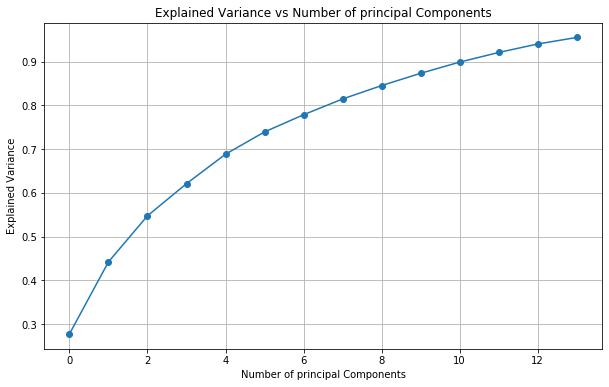

In [37]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,6))
plt.plot(explained_variance,marker='o')
plt.xlabel('Number of principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs Number of principal Components')
plt.grid(True)
plt.show()

In [38]:
# Top 5 Eigen values 
top_eigen_val=pca.explained_variance_[:5]
print('Top 5 Eigen values: ')
print(top_eigen_val)

Top 5 Eigen values: 
[8.31315985 4.95068122 3.16244649 2.20911368 2.02316938]


In [39]:
# Top 5 Eigen vectors 
top_eigen_vactor=pca.components_[:5]
print('Top 5 Eigen vectors: ')
print(top_eigen_vactor)

Top 5 Eigen vectors: 
[[ 2.15609639e-01  1.65734882e-01  5.15869012e-02  4.63202484e-03
   1.42968783e-01  6.17559512e-02 -6.88758573e-02  4.95204409e-02
  -9.09553666e-02  3.27262388e-02  2.80173171e-02 -2.67701803e-01
  -2.24894850e-01  1.91905806e-01 -5.10718091e-02 -3.14432768e-01
   1.91642498e-01 -2.16275137e-01 -2.21849872e-01 -3.16419897e-01
  -3.10172967e-01  1.14833872e-01 -2.95310164e-01 -3.13394969e-01
   2.48958562e-01 -4.55924900e-02 -2.02781510e-02 -7.21921867e-03
  -1.64420300e-01  4.49568697e-02]
 [-2.25206262e-01 -1.99603619e-01 -9.10605853e-02  1.84897691e-02
  -1.19694089e-01 -1.69430911e-01  7.53044837e-02 -4.13727605e-01
  -3.35417462e-01 -3.46629453e-01 -1.55629115e-01 -1.33970608e-02
  -8.30197377e-02 -1.47434035e-02 -1.52610520e-01 -3.37137903e-02
  -1.10065058e-01 -8.58785503e-02 -2.23527093e-01 -1.12792467e-01
  -1.26073593e-01 -3.55245414e-01 -8.22358115e-02 -1.52583873e-01
  -1.78472536e-01 -9.87601061e-02  2.08893386e-01  1.63970442e-01
   1.45953559e-01  

### 2.b. Create a random matrix (M) of size 20x8 and compute singular values, left singular matrix and right singular matrix using Singular Value Decomposition. Try to reproduce the M back using singluar values and vectors. (5 Marks)


In [43]:
M = np.random.rand(20,8)

U,S,VT =np.linalg.svd(M)

s_diag =np.diag(S)

M_recontructed = U[:,:8]@s_diag@VT

print('Original Matrix M')
print(M)
print('Reconstructed Matrix M')
print(M_recontructed)

reconstruction_error=np.linalg.norm(M-M_recontructed)
print(f"Reconstruction error:{reconstruction_error}")

Original Matrix M
[[0.12190451 0.28423603 0.98765901 0.71570632 0.77850606 0.39805753
  0.30834857 0.15270968]
 [0.94722384 0.76052512 0.88416273 0.62128405 0.87346459 0.91718598
  0.82930417 0.00374669]
 [0.92465506 0.48568767 0.14933335 0.7865376  0.2770216  0.02406787
  0.99461626 0.58299504]
 [0.7768557  0.8862146  0.97330599 0.51133488 0.12739328 0.55467609
  0.61206328 0.7145783 ]
 [0.43953314 0.53893266 0.43842241 0.89095098 0.30936489 0.83895519
  0.11370875 0.16159721]
 [0.47011631 0.68669214 0.30005168 0.46247071 0.19720695 0.86326486
  0.39154592 0.46132099]
 [0.39782443 0.5385471  0.81460846 0.46455012 0.8375335  0.14773666
  0.86385406 0.36090891]
 [0.89755037 0.63565609 0.9240879  0.07705352 0.52868324 0.36787154
  0.4957761  0.32601571]
 [0.28031819 0.95809673 0.68216602 0.85491653 0.19413163 0.46122321
  0.72951377 0.14537523]
 [0.92840036 0.62843941 0.96189686 0.8100369  0.03161611 0.26819495
  0.26090897 0.18749217]
 [0.33441608 0.0052059  0.32872433 0.99795419 0.6907

### 2.c. Apply SVD on inp_data_dime and compare the SVD transform data with PCA transformed data. Also compare the top 5 singular vectors with eigen vector. How many Singular vectors are required to reproduce the 95% charecteristics of original data.(5 Marks)

In [44]:
svd =TruncatedSVD(n_components=num_components)
data_time_svd=svd.fit_transform(scaled_data)

In [45]:
top_5_singular_vectors = svd.components_[:5]
print("Top 5 singular vector:")
print(top_5_singular_vectors)

Top 5 singular vector:
[[ 2.15609639e-01  1.65734882e-01  5.15869012e-02  4.63202484e-03
   1.42968783e-01  6.17559512e-02 -6.88758573e-02  4.95204409e-02
  -9.09553666e-02  3.27262388e-02  2.80173171e-02 -2.67701803e-01
  -2.24894850e-01  1.91905806e-01 -5.10718091e-02 -3.14432768e-01
   1.91642498e-01 -2.16275137e-01 -2.21849872e-01 -3.16419897e-01
  -3.10172967e-01  1.14833872e-01 -2.95310164e-01 -3.13394969e-01
   2.48958562e-01 -4.55924900e-02 -2.02781510e-02 -7.21921867e-03
  -1.64420300e-01  4.49568697e-02]
 [-2.25206262e-01 -1.99603619e-01 -9.10605853e-02  1.84897691e-02
  -1.19694089e-01 -1.69430911e-01  7.53044837e-02 -4.13727605e-01
  -3.35417462e-01 -3.46629453e-01 -1.55629115e-01 -1.33970608e-02
  -8.30197377e-02 -1.47434035e-02 -1.52610520e-01 -3.37137903e-02
  -1.10065058e-01 -8.58785503e-02 -2.23527093e-01 -1.12792467e-01
  -1.26073593e-01 -3.55245414e-01 -8.22358115e-02 -1.52583873e-01
  -1.78472536e-01 -9.87601061e-02  2.08893386e-01  1.63970442e-01
   1.45953559e-01 

In [49]:
svd_explained_variance = svd.explained_variance_ratio_
num_svd_components = next(i for i,total_var in enumerate(svd_explained_variance.cumsum()) if total_var >= 0.95)+1
print(f"Number of SVD components to explain 95% variance ={num_svd_components}")

Number of SVD components to explain 95% variance =14


### 2.d.Clustering: Use PCA dimensions to cluster the data. Apply K-means and Agglomerative clustering. (5 Marks)

Some pointers which would help you, but don’t be limited by these

1. Find the optimal number of cluster Values for both Kmeans and Agglomerative clustering. 
2. Using best attributes based on the relationship between them, plot the clusters. 


In [51]:
pca_dims=pca_scaled_data[:,:num_components]

kmeans=KMeans(n_clusters=5,n_init=10)
kmeans_labels=kmeans.fit_predict(pca_dims)
print("K-means clustering labels:")
print(kmeans_labels)

K-means clustering labels:
[2 0 0 ... 1 0 1]


In [54]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(pca_dims)
print("Agglomerative clustering labels:")
print(agglo_labels)

Agglomerative clustering labels:
[1 2 2 ... 3 2 3]


<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Section C - 15 Marks </h1> 

In [55]:
data_recom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85724 entries, 0 to 85723
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   UserID     85724 non-null  int64
 1   ItemID     85724 non-null  int64
 2   Rating     85724 non-null  int64
 3   Timestamp  85724 non-null  int64
dtypes: int64(4)
memory usage: 2.6 MB



### 3 (a) Build the popularity based recommendation system and suggest top 5 items. (5 Marks)

Use the dataset: data_recom


In [63]:
#data_recom.columns = ['UserID','ItemID','Rating','Timestamp']
item_popularity = data_recom.groupby('ItemID').agg({'Rating':['mean','count']})
item_popularity.columns=['Average_rating','Rating_count']

top_items =item_popularity.sort_values(by=['Rating_count','Average_rating'],ascending=False).head(5)

print("TOP 5 Popular items ")
print(top_items)

TOP 5 Popular items 
        Average_rating  Rating_count
ItemID                              
1650          4.354125           497
1519          4.007026           427
1442          3.812646           427
1600          4.176471           425
1412          3.486811           417



### 3 (b) Build collaborative recommendation engine to recommend a top 5 items to the specific user. Measure the model quality in terms of RMSE (10 Marks)
Use the dataset: data_recom

In [66]:
from surprise import SVD
from surprise.accuracy import rmse

reader = Reader(rating_scale=(data_recom['Rating'].min(),data_recom['Rating'].max()))
data_cf = Dataset.load_from_df(data_recom[['UserID','ItemID','Rating']],reader)

In [67]:
trainset,testset=train_test_split(data_cf,test_size=0.2)

In [68]:
# building a user-based collaborative filtering model
sim_options ={'name':'cosine','user_based':True}
model = KNNWithMeans(sim_options=sim_options)
model.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [72]:
predictions=model.test(testset)
rmse = accuracy.rmse(predictions)

RMSE: 0.9672


In [75]:
def get_top_n_recommendations(algo,user_id,n=1):
    all_items = data_recom['ItemID'].unique()
    rated_items = data_recom[data_recom['UserID'] == user_id]['ItemID']
    items_to_recommend = [item for item in all_items if item not in rated_items]
    
    predictions =[algo.predict(user_id,item_id) for item_id in items_to_recommend]
    
    predictions.sort(key=lambda x:x.est,reverse=True)
    
    top_n_items = predictions[:n]
    return top_n_items

In [76]:
user_id= data_recom['UserID'].iloc[10]
top_recommendations= get_top_n_recommendations(model,user_id,n=2)

print(f"Top recommendations for user {user_id}")
for recommendation in top_recommendations:
    print(f"Item {recommendation.iid} with predicted rating {recommendation.est}")

Top recommendations for user 993
Item 394 with predicted rating 5
Item 511 with predicted rating 5


In [ ]:
# Using SVD for collaborative filtering

In [78]:
from surprise import SVD
model_svd=SVD(n_factors=50,n_epochs=200)
model_svd.fit(trainset)

In [79]:
predictions=model_svd.test(testset)
rmse = accuracy.rmse(predictions)

RMSE: 1.0417


In [80]:
user_id= data_recom['UserID'].iloc[2]
top_recommendations= get_top_n_recommendations(model_svd,user_id,n=5)

print(f"Top recommendations for user {user_id}")
for recommendation in top_recommendations:
    print(f"Item {recommendation.iid} with predicted rating {recommendation.est}")

Top recommendations for user 855
Item 1543 with predicted rating 5
Item 1509 with predicted rating 5
Item 1497 with predicted rating 5
Item 1688 with predicted rating 5
Item 1385 with predicted rating 5
